# Exercise 7-1, 8-1 & 8-2

### DSC530
#### Taniya Adhikari
##### 10/25/2020

## Exercise 7-1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [95]:
from __future__ import print_function, division

%matplotlib inline


import first
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import thinkstats2
import thinkplot

import scipy

In [96]:
# creating a dataframe and dropping variable with nan
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [97]:
# variable age
mother_age = live.agepreg

# variable birth weight
birth_weight = live.totalwgt_lb

Text(0.5, 0, 'Age')

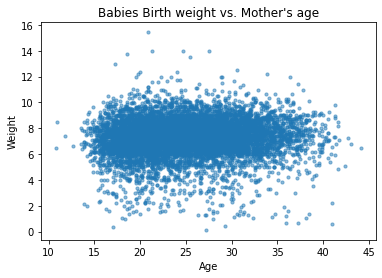

In [98]:
# Scatter plot using mathplotlib.pyplot
plt.scatter(mother_age, birth_weight, s=10, alpha=0.5)
plt.title("Babies Birth weight vs. Mother's age")
plt.ylabel("Weight")
plt.xlabel("Age")


**Above Plot has too much saturation**

Text(0.5, 0, 'Age')

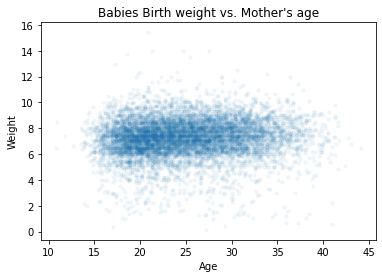

In [99]:
# Scatter plot using mathplotlib.pyplot
plt.scatter(mother_age, birth_weight, s=10, alpha=0.05)
plt.title("Babies Birth weight vs. Mother's age")
plt.ylabel("Weight")
plt.xlabel("Age")


**This one is much better**

In [100]:
# calculating pearsonr usign scripy.stats. It gives two sided value, but we will need only first.
corr, _ = scipy.stats.pearsonr(mother_age, birth_weight)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.069


In [101]:
# calculating spearmanr usign scripy.stats. It gives two sided value, but we will need only first.
spcorr, _ = scipy.stats.spearmanr(mother_age, birth_weight)
print('Pearsons correlation: %.3f' % spcorr)

Pearsons correlation: 0.095


In [106]:
# array of bins from 10 to 45 with increments of 5
bins = np.arange(10, 45, 3)  

# index of the bin
indices = np.digitize(live.agepreg, bins)

# grouping them by indices
groups = live.groupby(indices)

In [107]:
for i, group in groups:
    print(i, len(group))

1 4
2 180
3 1169
4 1824
5 1695
6 1505
7 1223
8 830
9 402
10 170
11 34
12 2


In [104]:
# caluclating mean and cdf for each group using thinkstats2.
ages = [group.agepreg.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

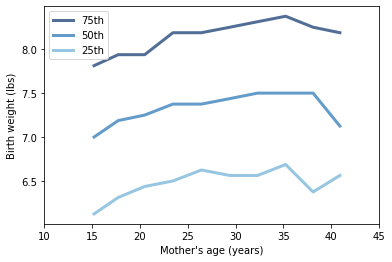

In [108]:
# plotting percentiles
thinkplot.PrePlot(3)
# calculating percentile for each group
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)

thinkplot.Config(xlabel="Mother's age (years)",
                ylabel='Birth weight (lbs)',
                xlim=[10, 45], legend=True)

**There is a weak relationship between the two variables (mother's age and birth weight). The pearson coefficient is 0.069 and spearman correlation is 0.09 which suggests a weak relationship, the scatterplot also shows a weak relationship between the two variable. Percentile shows a non-linear relationship.**

## Exercise 8-1

In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [205]:
## mean error function
def RMeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]    
    return np.mean(errors)
    
    

In [206]:
## root mean squared error function
def RMeanSquaredError(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    rmse = np.sqrt(mse)
    return rmse

In [207]:
import random
def SampleMeanMedian(n, iters):
    # n is sample size and iters is number of iterations
    mu = 0
    sigma = 1

    #creating a list of mean & median of random sample
    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
        
        mean_error1 = MeanError(means, mu)
        mean_error2 = MeanError(medians, mu)
    
    print("The mean error with xbar is: {}".format(mean_error1))
    print("The mean error with median is: {}".format(mean_error2))


In [208]:
def SampleStd(n, iters):
    mu = 0
    sigma = 1

    std1 = []
    std2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        std1.append(biased)
        std2.append(unbiased)
        
    rmse1 = RMeanSquaredError(std1, sigma**2)
    print("The Root Mean Squared Error with biased: {}".format(rmse1))
    
    rmse2 = RMeanSquaredError(std2, sigma**2)
    print("The Root Mean Squared Error with unbiased: {}".format(rmse2))

In [209]:
SampleMeanMedian(10, 1000)
SampleStd(10, 1000)


The mean error with xbar is: -0.0027834177873470186
The mean error with median is: -0.014027244200677934
The Root Mean Squared Error with biased: 0.4427145470442631
The Root Mean Squared Error with unbiased: 0.48021331965839725


In [210]:
SampleMeanMedian(10, 10000)
SampleStd(10, 10000)

The mean error with xbar is: -0.0007676396747795165
The mean error with median is: -0.001770031884916484
The Root Mean Squared Error with biased: 0.4397957695936159
The Root Mean Squared Error with unbiased: 0.47711996573963433


**xbar and median are both unbiased estimator as both yeilds mean error close to 0, but median error is smaller than the mean erro**
**The biased estimator of variance yields lower RMSE than the unbiased estimator.**

## Exercise 8-2

Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

In [240]:
lam = 2
n = 10
iters = 1000
    
estimates1 = []
for _ in range(iters):
    xs = np.random.exponential(1.0/lam, n)
    L = 1.0 / np.mean(xs)  # L is the estimator of λ=2
    estimates1.append(L)

In [241]:
# Standard error is root mean square
stderr = RMeanSquaredError(estimates1, lam)
print('Standard Error of the estimates', stderr)

Standard Error of the estimates 0.8206215064444312


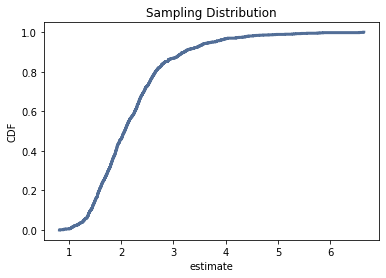

In [242]:
cdf = thinkstats2.Cdf(estimates1)

# plot the CDF
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='estimate',
                ylabel='CDF',
                title='Sampling Distribution')


In [243]:
CI = cdf.Percentile(5), cdf.Percentile(95)
print('confidence Interval of the estimates', CI)

confidence Interval of the estimates (1.2990354469992451, 3.7236583761051363)


In [237]:
n = 10
lam = 2
iters = 1000

estimates2 = []
stderror = []
sample_size = []    


for n in range(10, 20):
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1.0 / np.mean(xs)  # L is the estimator of λ=2
        estimates2.append(L)
    
    # Standard error is root mean square
    stderr = RMeanSquaredError(estimates2, lam)
    stderror.append(stderr)  ## adding stderr to stderror list
    sample_size.append(n)    ## adding n to sample_size list


## creating dataframe of standarderror and sample size
d = {'StandardError':stderror,'SampleSize':sample_size}
df = pd.DataFrame(d)
df


,StandardError,SampleSize
0,0.794200,10
1,0.753447,11
2,0.735260,12
3,0.722709,13
4,0.705159,14
5,0.688583,15
6,0.680004,16
7,0.662668,17
8,0.648545,18
9,0.636433,19


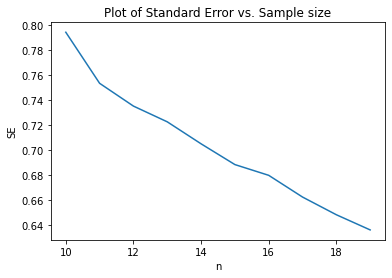

In [239]:

# plotting SE vs n
plt.plot(df.SampleSize,df.StandardError)
plt.title('Plot of Standard Error vs. Sample size')
plt.xlabel('n')
plt.ylabel('SE')
plt.show()

According to the plot, standard error decreases as the sample size increases.